In [11]:
#@author-Tejasvi Sharma
#Implementing basic linear regression using sklearn
import pandas as pd
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448          

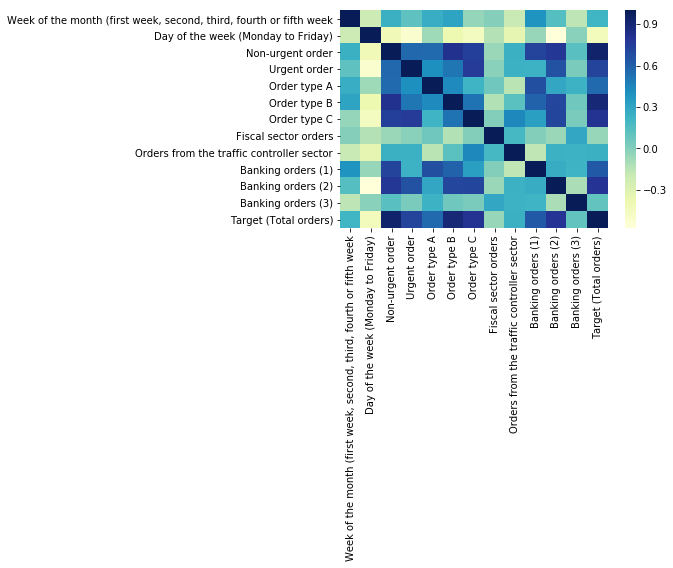

In [14]:
#reading data file
df=pd.read_csv("/home/tejasvi-ts/Downloads/Daily_Demand_Forecasting_Orders.csv",sep=";")
print(df.head())
print(df.columns)
#correlation plot
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()



In [25]:
#column Week of the month and day of the week are ordinal, so will convert them to binary dummy varibales
df.columns.values[0]='Week of the month'
df.columns.values[1]='Day of the week'
print(df.columns)
df = pd.get_dummies(df, columns=['Week of the month'])


Index(['Week of the month', 'Day of the week', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')


ValueError: labels ['Week of the month'] not contained in axis